In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv(r'F:\Deep Learning Assignments\Assignment-3\iris_modified.csv')

In [16]:
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [17]:
df.shape

(100, 6)

In [18]:
df = df.drop('Unnamed: 0',axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


## EDA

<Axes: xlabel='species', ylabel='sepal_length'>

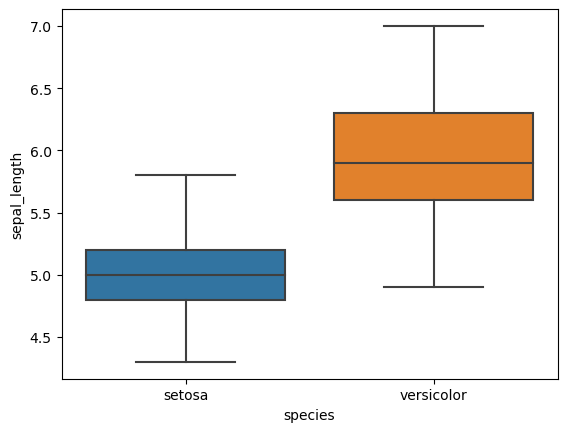

In [20]:
sns.boxplot(data = df, x='species', y='sepal_length')

## Observation:
By observing the above plot, we can't accurately determine the exact range of sepal_length for setosa and versicolor as there are overlapping of values. Hence sepal_length can't alone effectively determine the species of the iris flower.

<Axes: xlabel='species', ylabel='sepal_width'>

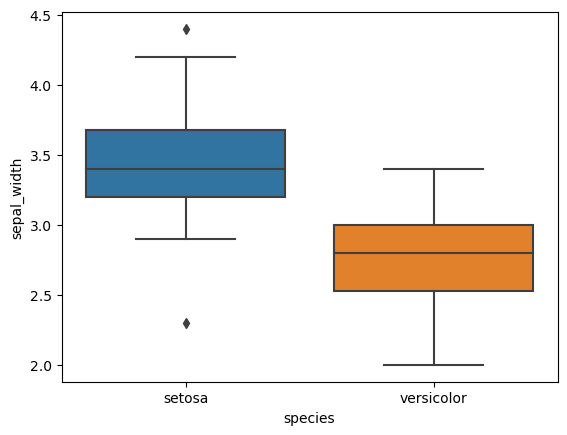

In [21]:
sns.boxplot(data = df, x='species', y='sepal_width')

## Observation:
By observing the above plot, we can't accurately determine the exact range of sepal_width for setosa and versicolor as there is a slight overlapping of values.This can lead to misclassification of the species. Hence sepal_width can't alone effectively determine the species of the iris flower.

<Axes: xlabel='species', ylabel='petal_length'>

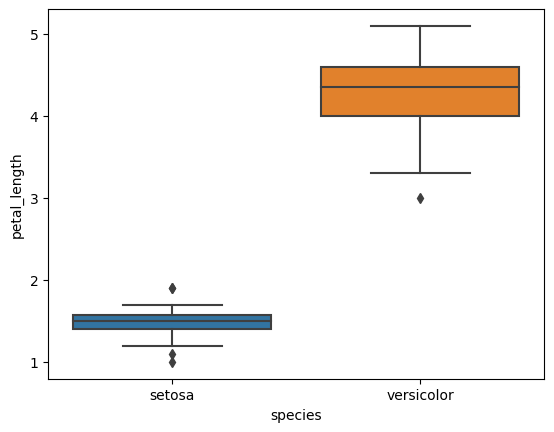

In [22]:
sns.boxplot(data = df, x='species', y='petal_length')

## Observation:
From the above plot, we can observe the range of petal length values for setosa and versicolor.The setosa flowers have the petal length in the range of 1 to 2 whereas for versicolor the petal length values are in the range of 3 to 5. By observing the petal length values we can clearly discriminate the setosa and versicolor species hence the petal length is an important feature for determing whether the iris flower is setosa or versicolor.

<Axes: xlabel='species', ylabel='petal_width'>

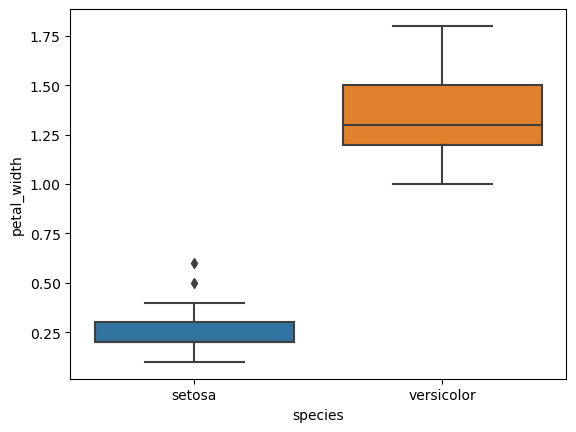

In [23]:
sns.boxplot(data = df, x='species', y='petal_width')

## Observation:
From the above plot, we can observe the range of petal width values for setosa and versicolor.The setosa flowers have the petal width upto 0.75 whereas for versicolor the petal width values are in the range of 1.00 to 1.80. By observing the petal width values we can clearly discriminate the setosa and versicolor species hence the petal width is an important feature for determing whether the iris flower is setosa or versicolor.

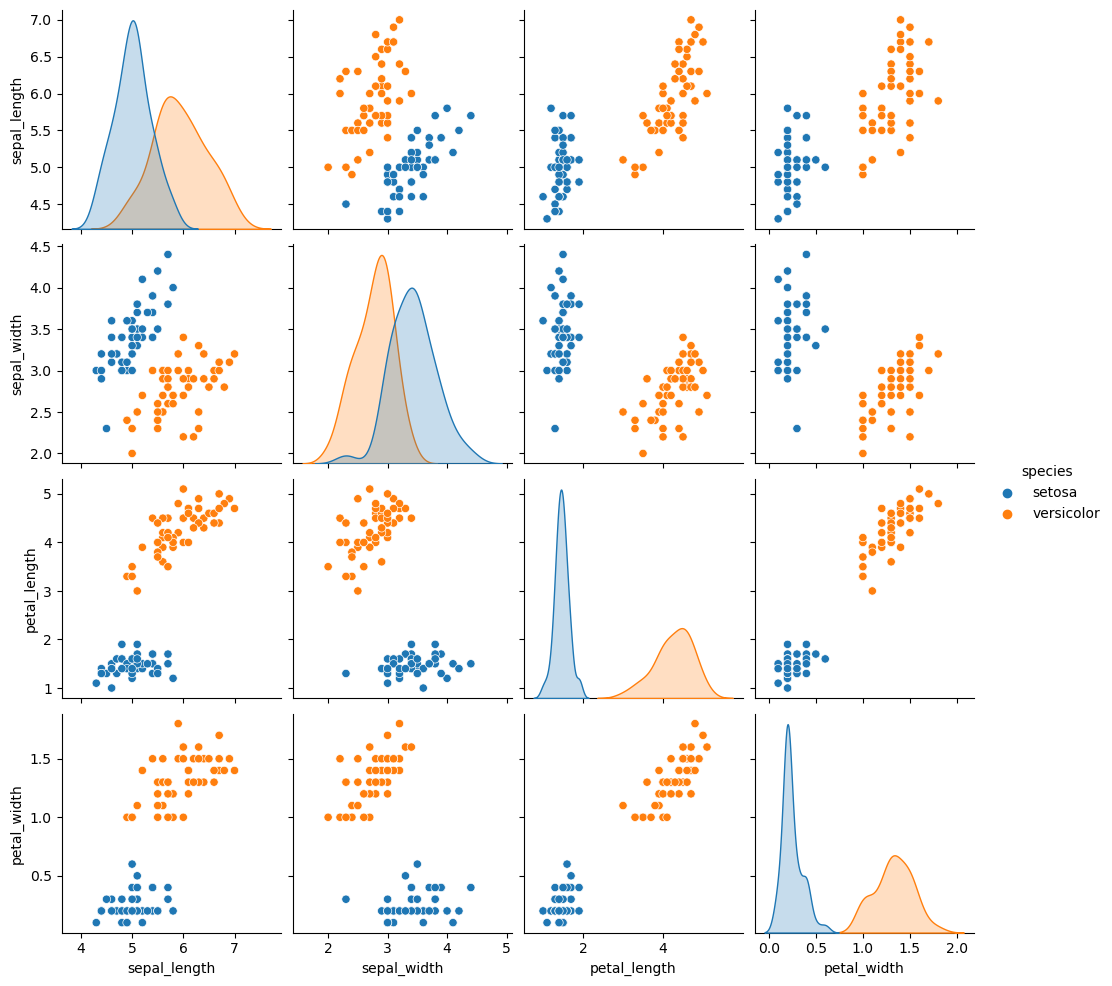

In [24]:
sns.pairplot(df,hue = 'species')

## Observation:
From the above plot, we can observe that 'petal_length' and 'petal_width' are the two features which are clearly able to distinguish between the two species 'setosa' and 'versicolor'. Hence by EDA we can conclude that the 'petal_length' and 'petal_width' are the features that are enough to determine the species of the iris flower.

## Implementing Percepton Trick

Weights: [-0.05701403  0.44446709]
Intercept: -0.2000000000000008


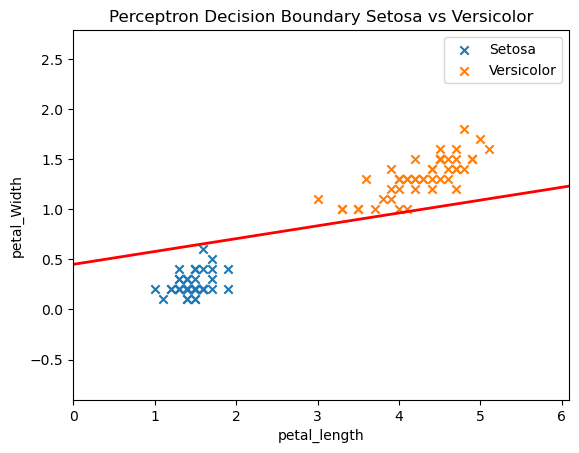

In [25]:
# Convert the species column to binary labels 0 and 1
df['species'] = df['species'].map({'setosa': 0, 'versicolor': 1})

# Extract features and labels
X = df[['petal_length', 'petal_width']].values
y = df['species'].values

# Initialize weights randomly between 0 and 1
w = np.random.rand(X.shape[1])
c = 1

# Define learning rate
learning_rate = 0.01

# Perceptron training
for iteration in range(1000):
    random_data_points = np.random.choice(len(X), size=len(X), replace=False)
    X_random = X[random_data_points]
    y_random = y[random_data_points]
    
    for i in range(len(X_random)):
        xi = X_random[i]
        yi = y_random[i]
        y_pred = np.dot(xi, w) + c
        if y_pred >= 0:
            prediction = 1
        else:
            prediction = 0
        if prediction != yi:
            # Misclassification
            if yi == 0:
                # True class is 0, subtract coordinates from weights
                w -= learning_rate * xi
            else:
                # True class is 1, add coordinates to weights
                w += learning_rate * xi
            c += learning_rate * (yi - prediction)

# Display weights and intercept
print("Weights:", w)
print("Intercept:", c)

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Setosa', marker='x')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Versicolor', marker='x')

# Plot the separator line
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + c
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')

plt.xlabel('petal_length')
plt.ylabel('petal_Width')
plt.legend()
plt.title('Perceptron Decision Boundary Setosa vs Versicolor')
plt.show()